# Assignment 1

Name: **Arnab Sen**
Roll: **510519006**

## (i) Download data

Data downloaded and stored at [drive](https://drive.google.com/drive/folders/1-2d4kuiufZHmaXDhBi2sAYeoYPgBnQqL).**bold text**

In [272]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [273]:
BASE_PATH = '/content/drive/MyDrive/Colab_Notebooks/ML_DRIVE/Assign_1/dataset'

In [274]:
import numpy as np
import pandas as pd # read csv files
from sklearn.model_selection import train_test_split # test and train data split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns # graph plot
import matplotlib.pyplot as plt # scatter plot
from sklearn.preprocessing import PolynomialFeatures # polynomial regression

## (ii) Reading and formating dataset 
Read the dataset in the Pandas data frame. Remove the rows with a missing value. Divide the training.csv into two sets of ratio 80:20 entitled to train and test set respectively.

In [275]:
dataset = pd.read_csv(f"{BASE_PATH}/train.csv")
scaler = StandardScaler()

In [276]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## (iii) Linear Regression

Use the linear regression method to estimate the slope and intercept for predicting `SalePrice` based on `LotArea`

Remove the missing rows corresponding to only `SalePrice` and `LotArea` columns.

In [277]:
df = dataset.loc[:, ['SalePrice', 'LotArea']].dropna()

Splitting the dataset in 80:20 ratio for fitting the model and then testing.

In [278]:
train_df, test_df = train_test_split(df, test_size=0.2)

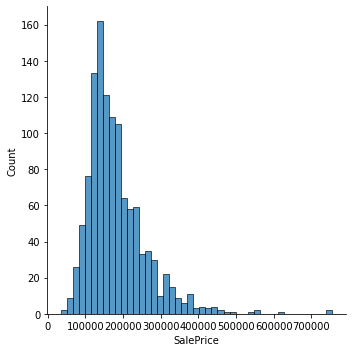

In [279]:
sns.displot(train_df['SalePrice']);

In [280]:
train_df.head()

,SalePrice,LotArea
599,151000,1950
44,141000,7945
802,189000,8199
1438,149700,7407
1453,84500,17217


In [281]:
test_df.head()

,SalePrice,LotArea
75,91000,1596
53,385000,50271
906,255000,13501
1366,193000,9179
1104,106000,2016


Scatter plot to see the relationship between `SalePrice` and `LotArea`.

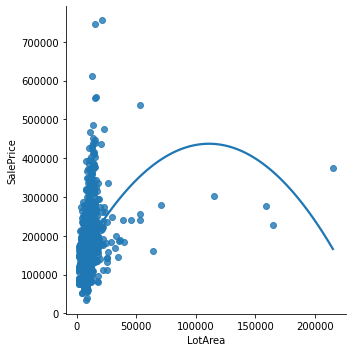

In [282]:
# ci: used to specify the size of the interval
sns.lmplot(x ="LotArea", y ="SalePrice", data = train_df, ci=None, order=2)

In [283]:
X_train = np.array(train_df['LotArea']).reshape(-1, 1) # have one column and as many rows as necessary
X_train = scaler.fit_transform(X_train)
y_train = np.array(train_df['SalePrice']).reshape(-1, 1)

X_test = np.array(test_df['LotArea']).reshape(-1, 1)
X_test = scaler.fit_transform(X_test)
y_test = np.array(test_df['SalePrice']).reshape(-1, 1)

In [284]:
model = LinearRegression()
 
new_model = model.fit(X_train, y_train)
y_pred = new_model.predict(X_test)

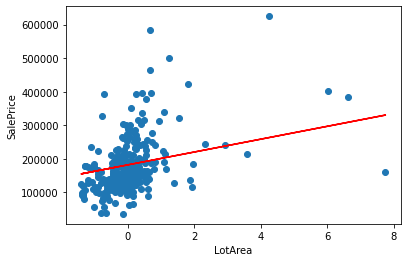

In [285]:
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color ='r')
 
plt.show()

- **Coefficient of Determination:** With linear regression, the coefficient of determination is equal to the square of the correlation between the x and y variables.

In [286]:
print("Linear Regression\n====================")
print("coefficient of determination (r-squared):", new_model.score(X_test, y_test)) 
print("intercept:", new_model.intercept_)
print("slope:", new_model.coef_)
mse_linear_regression = mean_squared_error(y_test, y_pred)
print("mean squared error:", mse_linear_regression)

Linear Regression
coefficient of determination (r-squared): 0.14798131359437894
intercept: [181709.82363014]
slope: [[19170.85729063]]
mean squared error: 5767710272.245401


## (iv) Multiple Regression
### Model 1: LotFrontage, LotArea

In [287]:
lot_area_weights = [] # required for question (vii)

In [288]:
df = dataset.loc[:, ['SalePrice', 'LotArea', 'LotFrontage']].dropna()

In [289]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [290]:
train_df.head()

,SalePrice,LotArea,LotFrontage
467,146500,9480,79.0
119,163990,8461,65.0
875,303477,9000,75.0
480,326000,16033,98.0
906,255000,13501,116.0


In [291]:
test_df.head()

,SalePrice,LotArea,LotFrontage
1071,154000,11700,78.0
946,143000,8163,70.0
755,172500,3230,34.0
30,40000,8500,50.0
570,142600,13101,74.0


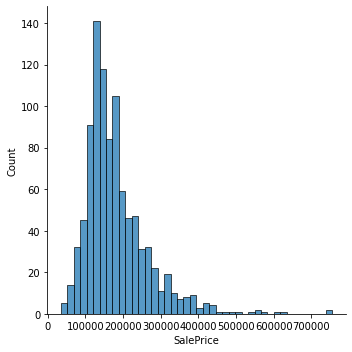

In [292]:
sns.displot(train_df['SalePrice']);

In [293]:
variables = ['LotArea', 'LotFrontage']
X_train = np.array(train_df[variables])
X_train = scaler.fit_transform(X_train)
y_train = np.array(train_df[['SalePrice']])

X_test = np.array(test_df[variables])
X_test = scaler.fit_transform(X_test)
y_test = np.array(test_df[['SalePrice']])

In [294]:
model = LinearRegression()
new_model = model.fit(X_train, y_train)

In [295]:
y_pred = new_model.predict(X_test)
r2_score_m1 = new_model.score(X_test, y_test)
mse_m1 = mean_squared_error(y_test, y_pred)
print("[Model 1] r2 score:", r2_score_m1) # same as sklearn.metrics.r2_score
print("[Model 1] mean squared error:", mse_m1)

[Model 1] r2 score: 0.18894409589343242
[Model 1] mean squared error: 4465301087.46941


In [296]:
print("Weights/Coefficients:\n")
for name, weight in zip(variables, new_model.coef_.reshape(-1)):
  if name == 'LotArea':
    lot_area_weights.append(weight)
    
  print(f"{name.ljust(25)} {weight}")

Weights/Coefficients:

LotArea                   18003.076786530026
LotFrontage               21198.762404965273


### Model 2: LotFrontage, LotArea, OverallQual, OverallCond

In [297]:
df = dataset.loc[:, ['SalePrice', 'LotArea', 'LotFrontage', 'OverallQual', 'OverallCond']].dropna()

In [298]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [299]:
train_df.head()

,SalePrice,LotArea,LotFrontage,OverallQual,OverallCond
1420,179900,11700,90.0,6,6
86,174000,11911,122.0,6,5
1403,282922,15256,49.0,8,5
267,179500,8400,60.0,5,8
248,180000,11317,72.0,7,5


In [300]:
test_df.head()

,SalePrice,LotArea,LotFrontage,OverallQual,OverallCond
588,143000,25095,65.0,5,8
1121,212900,10084,84.0,7,5
847,133500,15523,36.0,5,6
1204,153500,10140,78.0,5,6
1050,176485,8993,73.0,7,5


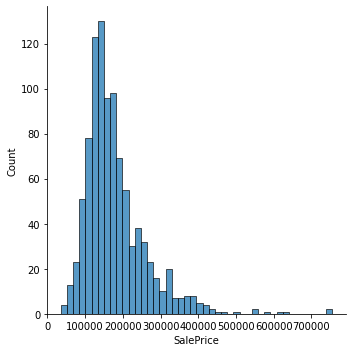

In [301]:
sns.displot(train_df['SalePrice']);

In [302]:
variables = ['LotArea', 'LotFrontage', 'OverallQual', 'OverallCond']
X_train = np.array(train_df[variables])
X_train = scaler.fit_transform(X_train)
y_train = np.array(train_df[['SalePrice']])

X_test = np.array(test_df[variables])
X_test = scaler.fit_transform(X_test)
y_test = np.array(test_df[['SalePrice']])

In [303]:
model = LinearRegression()
new_model = model.fit(X_train, y_train)

In [304]:
y_pred = new_model.predict(X_test)
r2_score_m2 = new_model.score(X_test, y_test)
mse_m2 = mean_squared_error(y_test, y_pred)
print("[Model 2] r2 score:", r2_score_m2) # same as sklearn.metrics.r2_score
print("[Model 2] mean squared error:", mse_m2)

[Model 2] r2 score: 0.7043508132745866
[Model 2] mean squared error: 2052790517.6136389


In [305]:
print("Weights/Coefficients:\n")
for name, weight in zip(variables, new_model.coef_.reshape(-1)):
  if name == 'LotArea':
    lot_area_weights.append(weight)
  print(f"{name.ljust(25)} {weight}")

Weights/Coefficients:

LotArea                   8862.459778565702
LotFrontage               10739.146228055622
OverallQual               62472.4520137272
OverallCond               135.6182336392569


### Model 3: LotFrontage, LotArea, OverallQual, OverallCond, 1stFlrSF, GrLivArea

In [306]:
df = dataset.loc[:, ['SalePrice', 'LotArea', 'LotFrontage', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']].dropna()

In [307]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [308]:
train_df.head()

,SalePrice,LotArea,LotFrontage,OverallQual,OverallCond,1stFlrSF,GrLivArea
1075,219500,13125,75.0,7,6,960,1740
446,190000,16492,137.0,6,6,1888,1888
93,133900,7200,60.0,6,6,1260,2291
503,289000,15602,100.0,7,8,1801,1801
371,134432,17120,80.0,4,4,1120,1588


In [309]:
test_df.head()

,SalePrice,LotArea,LotFrontage,OverallQual,OverallCond,1stFlrSF,GrLivArea
595,319000,11302,69.0,8,5,1826,1826
365,147000,10690,59.0,5,7,672,1344
440,555000,15431,105.0,10,5,2402,2402
289,153575,8730,60.0,6,7,698,1396
981,336000,12203,98.0,8,5,1276,2612


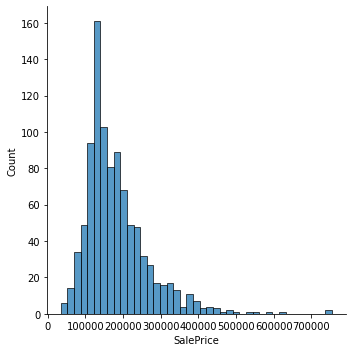

In [310]:
sns.displot(train_df['SalePrice']);

In [311]:
variables = ['LotArea', 'LotFrontage', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']
X_train = np.array(train_df[variables])
X_train = scaler.fit_transform(X_train)
y_train = np.array(train_df[['SalePrice']])

X_test = np.array(test_df[variables])
X_test = scaler.fit_transform(X_test)
y_test = np.array(test_df[['SalePrice']])

In [312]:
model = LinearRegression()
new_model = model.fit(X_train, y_train)

In [313]:
y_pred = new_model.predict(X_test)
r2_score_m3 = new_model.score(X_test, y_test)
mse_m3 = mean_squared_error(y_test, y_pred)
print("[Model 3] r2 score:", r2_score_m3) # same as sklearn.metrics.r2_score
print("[Model 3] mean squared error:", mse_m3)

[Model 3] r2 score: 0.7180087039489944
[Model 3] mean squared error: 1704631344.9561703


In [314]:
print("Weights/Coefficients:\n")
for name, weight in zip(variables, new_model.coef_.reshape(-1)):
  if name == 'LotArea':
    lot_area_weights.append(weight)
  print(f"{name.ljust(25)} {weight}")

Weights/Coefficients:

LotArea                   7057.920345774349
LotFrontage               -303.05755787223825
OverallQual               46592.153445790944
OverallCond               1552.500016010084
1stFlrSF                  12198.610608555135
GrLivArea                 22959.99196815228


## (v) Compare the Mean squared Error, R2 score

#### Comparing R2 score

#### Comparing Mean Squared Error

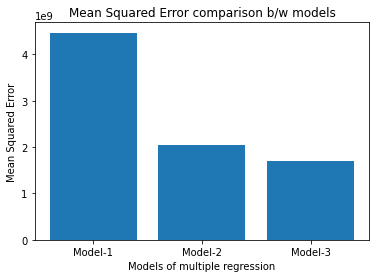

In [315]:
plt.xlabel("Models of multiple regression")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error comparison b/w models")
plt.bar(["Model-1", "Model-2", "Model-3"], [mse_m1, mse_m2, mse_m3])
plt.show()

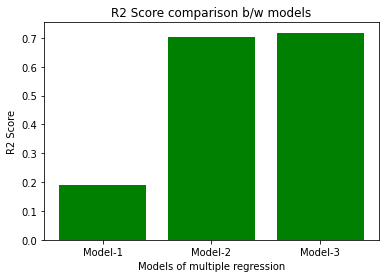

In [316]:
plt.xlabel("Models of multiple regression")
plt.ylabel("R2 Score")
plt.title("R2 Score comparison b/w models")
plt.bar(["Model-1", "Model-2", "Model-3"], [r2_score_m1, r2_score_m2, r2_score_m3], color="green")
plt.show()

## (vi) Multiple Regression (contd.)
### Model 4: LotArea, Street

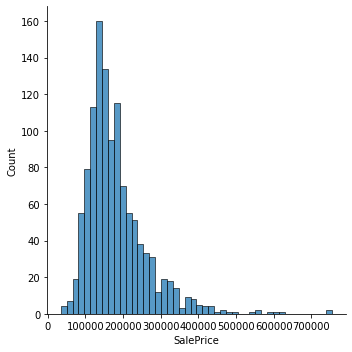

In [317]:
df = dataset.loc[:, ['SalePrice', 'LotArea', 'Street']].dropna()
df = pd.get_dummies(df, columns = ['Street'])
train_df, test_df = train_test_split(df, test_size=0.2)
sns.displot(train_df['SalePrice']);

In [318]:
test_df.head()

,SalePrice,LotArea,Street_Grvl,Street_Pave
217,107000,9906,0,1
1242,170000,10625,0,1
945,124900,8820,0,1
1357,149900,12537,0,1
163,103200,5500,0,1


In [319]:
train_df.head()

,SalePrice,LotArea,Street_Grvl,Street_Pave
393,100000,7446,0,1
776,221500,11210,0,1
552,255500,11146,0,1
1304,130000,3363,0,1
1420,179900,11700,0,1


In [320]:
variables = train_df.columns.array[1:]
X_train = np.array(train_df[variables])
X_train = scaler.fit_transform(X_train)
y_train = np.array(train_df[['SalePrice']])
X_test = np.array(test_df[variables])
X_test = scaler.fit_transform(X_test)
y_test = np.array(test_df[['SalePrice']])

In [321]:
model = LinearRegression()
new_model = model.fit(X_train, y_train)

In [322]:
y_pred = new_model.predict(X_test)
r2_score_m4 = new_model.score(X_test, y_test)
mse_m4 = mean_squared_error(y_test, y_pred)
print("[Model 4] r2 score:", r2_score_m4) # same as sklearn.metrics.r2_score
print("[Model 4] mean squared error:", mse_m4)

[Model 4] r2 score: 0.03592748703897697
[Model 4] mean squared error: 4941760310.846153


In [323]:
print("Weights/Coefficients:\n")
for name, weight in zip(variables, new_model.coef_.reshape(-1)):
  if name == 'LotArea':
    lot_area_weights.append(weight)
  print(f"{name.ljust(25)} {weight}")

Weights/Coefficients:

LotArea                   24258.824360028957
Street_Grvl               -2.103931852980475e+18
Street_Pave               -2.103931852980467e+18


### Model 5: LotArea, OverallCond, Street, Neighborhood

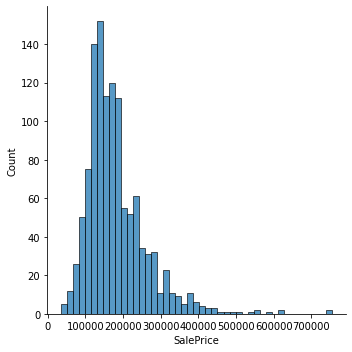

In [324]:
df = dataset.loc[:, ['SalePrice', 'LotArea', 'OverallCond', 'Street', 'Neighborhood']].dropna()
df = pd.get_dummies(df, columns = ['Street', 'Neighborhood'])
train_df, test_df = train_test_split(df, test_size=0.2)
sns.displot(train_df['SalePrice']);

In [325]:
train_df.head()

,SalePrice,LotArea,OverallCond,Street_Grvl,Street_Pave,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
233,128200,10650,6,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1281,180000,8049,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
938,239799,8760,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
762,215200,8640,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1414,207000,13053,7,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [326]:
test_df.head()

,SalePrice,LotArea,OverallCond,Street_Grvl,Street_Pave,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
741,142000,6768,8,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
570,142600,13101,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1271,185750,9156,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190,315000,10570,8,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
503,289000,15602,8,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [327]:
variables = train_df.columns.array[1:]
X_train = np.array(train_df[variables])
X_train = scaler.fit_transform(X_train)
y_train = np.array(train_df[['SalePrice']])

X_test = np.array(test_df[variables])
X_test = scaler.fit_transform(X_test)
y_test = np.array(test_df[['SalePrice']])

In [328]:
model = LinearRegression()
new_model = model.fit(X_train, y_train)

In [329]:
y_pred = new_model.predict(X_test)
r2_score_m5 = r2_score(y_test, y_pred)
mse_m5 = mean_squared_error(y_test, y_pred)
print("[Model 5] r2 score:", r2_score_m5) # same as sklearn.metrics.r2_score
print("[Model 5] mean squared error:", mse_m5)

[Model 5] r2 score: -5.462117067358696e+25
[Model 5] mean squared error: 2.842884981217866e+35


In [330]:
print("Weights/Coefficients:\n")
for name, weight in zip(variables, new_model.coef_.reshape(-1)):
  if name == 'LotArea':
    lot_area_weights.append(weight)
  print(f"{name.ljust(25)} {weight}")

Weights/Coefficients:

LotArea                   15977.35125907898
OverallCond               8291.768367203786
Street_Grvl               1.4985119376798313e+18
Street_Pave               1.4985119376798364e+18
Neighborhood_Blmngtn      -4.903717487170676e+17
Neighborhood_Blueste      -1.9325335685306864e+17
Neighborhood_BrDale       -4.5146677589772614e+17
Neighborhood_BrkSide      -8.996195991429783e+17
Neighborhood_ClearCr      -6.354281091819452e+17
Neighborhood_CollgCr      -1.38718857898456e+18
Neighborhood_Crawfor      -8.29265873648037e+17
Neighborhood_Edwards      -1.1737896044948403e+18
Neighborhood_Gilbert      -1.0715370892887411e+18
Neighborhood_IDOTRR       -7.630041994550884e+17
Neighborhood_MeadowV      -5.4331163342291085e+17
Neighborhood_Mitchel      -8.292658736480454e+17
Neighborhood_NAmes        -1.668231901758573e+18
Neighborhood_NPkVill      -3.8551098844421715e+17
Neighborhood_NWAmes       -1.0479394302686234e+18
Neighborhood_NoRidge      -7.744933160441996e+17
Ne

### Model 6: LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, Year

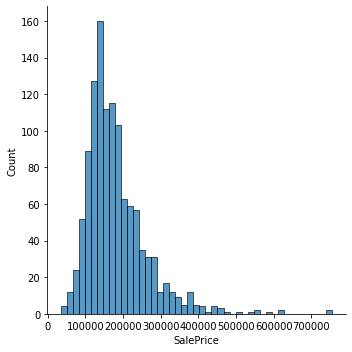

In [331]:
df = dataset.loc[:, ['SalePrice', 'LotArea', 'OverallCond', 'Street', '1stFlrSF', 'Neighborhood', 'YearBuilt']].dropna()
df = pd.get_dummies(df, columns = ['Street', 'Neighborhood'])
train_df, test_df = train_test_split(df, test_size=0.2)
sns.displot(train_df['SalePrice']);

In [332]:
train_df.head()

,SalePrice,LotArea,OverallCond,1stFlrSF,YearBuilt,Street_Grvl,Street_Pave,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
405,150000,9991,4,1620,1976,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
890,122900,8064,7,672,1949,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1256,301500,14303,5,1987,1994,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1219,91500,1680,5,672,1971,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1067,167900,9760,6,798,1964,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [333]:
test_df.head()

,SalePrice,LotArea,OverallCond,1stFlrSF,YearBuilt,Street_Grvl,Street_Pave,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
981,336000,12203,5,1276,1998,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
798,485000,13518,5,1966,2008,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
464,124000,8430,5,1040,1978,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1136,119000,9600,5,1032,1950,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
401,164990,8767,5,1310,2005,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [334]:
variables = train_df.columns.array[1:]
X_train = np.array(train_df[variables])
X_train = scaler.fit_transform(X_train)
y_train = np.array(train_df[['SalePrice']])

X_test = np.array(test_df[variables])
X_test = scaler.fit_transform(X_test)
y_test = np.array(test_df[['SalePrice']])

In [335]:
model = LinearRegression()
new_model = model.fit(X_train, y_train)

In [336]:
y_pred = new_model.predict(X_test)
r2_score_m6 = r2_score(y_test, y_pred)
mse_m6 = mean_squared_error(y_test, y_pred)
print("[Model 6] r2 score:", r2_score_m6) # same as sklearn.metrics.r2_score
print("[Model 6] mean squared error:", mse_m6)

[Model 6] r2 score: -5.457098552528068e+22
[Model 6] mean squared error: 2.9030478443896677e+32


In [337]:
print("Weights/Coefficients:\n")
for name, weight in zip(variables, new_model.coef_.reshape(-1)):
  if name == 'LotArea':
    lot_area_weights.append(weight)
  print(f"{name.ljust(25)} {weight}")

Weights/Coefficients:

LotArea                   9649.838114536089
OverallCond               12909.33574022097
1stFlrSF                  30241.98159192617
YearBuilt                 21322.116831710307
Street_Grvl               1.4247004510097416e+16
Street_Pave               1.4247004510100894e+16
Neighborhood_Blmngtn      1.2550049681081134e+16
Neighborhood_Blueste      4768071901278653.0
Neighborhood_BrDale       1.1629152423225832e+16
Neighborhood_BrkSide      2.3344491948968852e+16
Neighborhood_ClearCr      1.5323920108050198e+16
Neighborhood_CollgCr      3.4754750569005932e+16
Neighborhood_Crawfor      2.071847555367409e+16
Neighborhood_Edwards      2.9957268640653976e+16
Neighborhood_Gilbert      2.624539095563849e+16
Neighborhood_IDOTRR       1.8243589062267188e+16
Neighborhood_MeadowV      1.1138880501593168e+16
Neighborhood_Mitchel      1.9661991313214108e+16
Neighborhood_NAmes        4.106259003253796e+16
Neighborhood_NPkVill      8244365020842694.0
Neighborhood_NWAmes       2

## (vi) Compare the feature “LotArea” weights/coefficients for all the six trained models and plot a graph using the Matplotlib library.

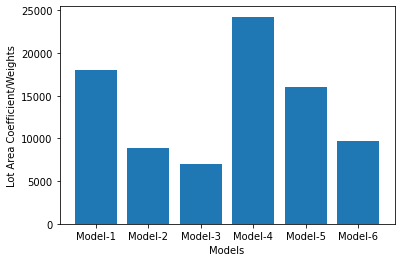

In [338]:
x_values = [f"Model-{x}" for x in range(1, 7)]
y_values = lot_area_weights
plt.bar(x_values, y_values)
plt.ylabel('Lot Area Coefficient/Weights')
plt.xlabel('Models')
plt.show()

## (vii) Polynomial regression

DegrDegree 2ee 2

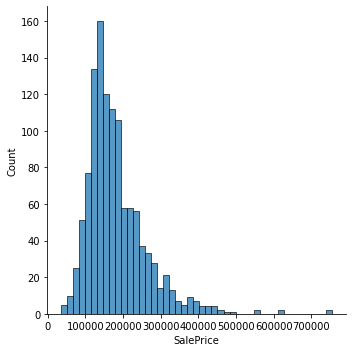

In [339]:
df = dataset.loc[:, ['SalePrice', 'LotArea']].dropna()
train_df, test_df = train_test_split(df, test_size=0.2)
sns.displot(train_df['SalePrice']);

In [340]:
train_df.head()

,SalePrice,LotArea
720,275000,6563
960,116500,7207
124,181000,17043
17,90000,10791
591,451950,13478


In [341]:
test_df.head()

,SalePrice,LotArea
908,131000,8885
1283,139000,9400
1193,165000,4500
998,91000,9786
83,126500,8892


In [342]:
variables = train_df.columns.array[1:]
X_train = np.array(train_df[variables])
X_train = scaler.fit_transform(X_train)
y_train = np.array(train_df[['SalePrice']])

X_test = np.array(test_df[variables])
X_test = scaler.fit_transform(X_test)
y_test = np.array(test_df[['SalePrice']])

In [343]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
model = LinearRegression()
new_model = model.fit(X_poly, y_train)

In [344]:
y_pred = new_model.predict(poly.fit_transform(X_test))
r2_score_poly = r2_score(y_test, y_pred)
mse_poly = mean_squared_error(y_test, y_pred)
print("[Poly] r2 score:", r2_score_poly)
print("[Poly] mean squared error:", mse_poly)

[Poly] r2 score: 0.14151946740561616
[Poly] mean squared error: 5232502359.016333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


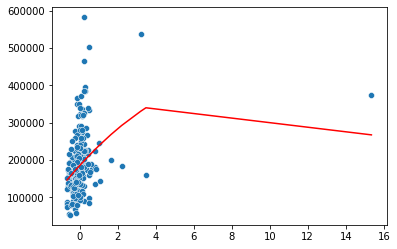

In [345]:
sns.scatterplot(X_test.reshape(-1), y_test.reshape(-1))
sns.lineplot(X_test.reshape(-1), y_pred.reshape(-1), color = 'red')

In [346]:
print("Weights/Coefficients:\n", new_model.coef_.reshape(-1))

Weights/Coefficients:
 [    0.         56060.78192413 -3300.9838299 ]


### Degree 3

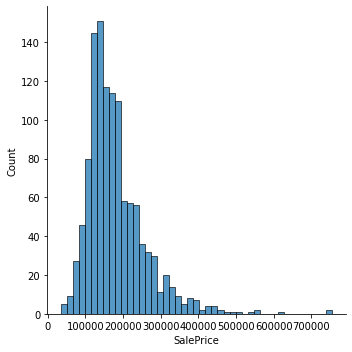

In [347]:
df = dataset.loc[:, ['SalePrice', 'LotArea']].dropna()
train_df, test_df = train_test_split(df, test_size=0.2)
sns.displot(train_df['SalePrice']);

In [348]:
train_df.head()

,SalePrice,LotArea
1112,129900,7100
697,123500,6420
1079,126000,8775
89,123600,8070
1125,115000,10434


In [349]:
test_df.head()

,SalePrice,LotArea
385,192000,3182
896,106500,8765
622,135000,7064
162,220000,12182
1400,120000,6000


In [350]:
variables = train_df.columns.array[1:]
X_train = np.array(train_df[variables])
X_train = scaler.fit_transform(X_train)
y_train = np.array(train_df[['SalePrice']])

X_test = np.array(test_df[variables])
X_test = scaler.fit_transform(X_test)
y_test = np.array(test_df[['SalePrice']])

In [351]:
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
model = LinearRegression()
new_model = model.fit(X_poly, y_train)

In [352]:
y_pred = new_model.predict(poly.fit_transform(X_test))
r2_score_poly = r2_score(y_test, y_pred)
mse_poly = mean_squared_error(y_test, y_pred)
print("[Poly Deg 3] r2 score:", r2_score_poly)
print("[Poly Deg 3] mean squared error:", mse_poly)

[Poly Deg 3] r2 score: 0.08977086485503138
[Poly Deg 3] mean squared error: 5829891043.974915


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


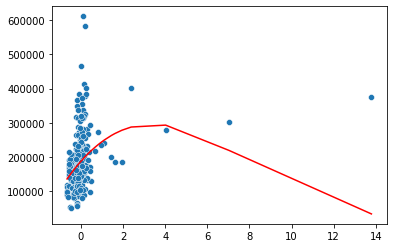

In [353]:
sns.scatterplot(X_test.reshape(-1), y_test.reshape(-1))
sns.lineplot(X_test.reshape(-1), y_pred.reshape(-1), color = 'red')

In [354]:
new_model.coef_

array([[     0.        ,  69593.45503156, -12804.01331804,
           503.80403025]])

In [355]:
print("Weights/Coefficients:\n", new_model.coef_.reshape(-1))

Weights/Coefficients:
 [     0.          69593.45503156 -12804.01331804    503.80403025]
